In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/database_proj/proj3

/content/drive/MyDrive/database_proj/proj3


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Data Cleaning

In [5]:
df = pd.read_csv('diabetic_data.csv')

In [6]:
# We can see that '?' represent the Nan value, we replace it with Nan
df.replace('?',np.nan, inplace = True)

In [7]:
# check the percentage of nan values for each feature
for col in df.columns:
    print(col,df[col].isna().sum()/len(df))

encounter_id 0.0
patient_nbr 0.0
race 0.022335554114340742
gender 0.0
age 0.0
weight 0.9685847925633315
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 0.395574160328597
medical_specialty 0.49082208203132677
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.0002063557573256294
diag_2 0.0035178743391702533
diag_3 0.013983059174970029
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


In [8]:
# We can see that there are too many missing value in 'weight', 'payer_code' and 'medical_specialty'. 
# We can just drop these columns.
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [10]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))
    print('-------------------------------------')
    print('-------------------------------------')
    print('-------------------------------------')

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
Female             54708
Male               47

In [11]:
# We can see that 'acetohexamide','troglitazone','examide','citoglipton','glimepiride-pioglitazone',
# 'metformin-rosiglitazone','metformin-pioglitazone' have unique value in the column 
# (or there are two categories and very few data points fall into one of the categories).
# These features cannot be good predictors, so we can also drop these columns.

df = df.drop(['acetohexamide','troglitazone','examide','citoglipton','glimepiride-pioglitazone',
              'metformin-rosiglitazone','metformin-pioglitazone' ], axis = 1)

In [12]:
df['race'] = df['race'].fillna('Other')

In [13]:
# Now, only 'gender','diag_1','diag_2','diag_3' contain Nan or 'Unknown' values. We can drop those rows.
df.replace('Unknown/Invalid',np.nan, inplace = True)
df = df.dropna(axis=0,how='any')

In [ ]:
# for col in df.columns:
#     print(df[col].value_counts(dropna=False))
#     print('-------------------------------------')
#     print('-------------------------------------')
#     print('-------------------------------------')

In [14]:
# We find that there are patients who have been hosipitalized for several times. 
# To be fair, we only consider the records of the first time they were hospitalized.
temp = df.groupby(['patient_nbr'])['encounter_id'].min()
temp = pd.DataFrame(temp)

In [15]:
df = df.merge(temp, how = 'inner',on = 'encounter_id', suffixes=('', '_dupindex'))

In [16]:
for col in df.columns:
    print(df[col].value_counts(dropna=False))
    print('-------------------------------------')
    print('-------------------------------------')
    print('-------------------------------------')

149190       1
178317252    1
178328706    1
178323210    1
178319802    1
            ..
102486114    1
102490338    1
102490350    1
102491214    1
443867222    1
Name: encounter_id, Length: 70413, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
55629189     1
88647516     1
45548631     1
97372134     1
25068024     1
            ..
5194530      1
12112497     1
2351223      1
24655401     1
175429310    1
Name: patient_nbr, Length: 70413, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
Caucasian          52762
AfricanAmerican    12654
Other               3038
Hispanic            1474
Asian                485
Name: race, dtype: int64
-------------------------------------
-------------------------------------
-------------------------------------
Female    37480
Male      32933
Name: gender, dtype: int64
------------------------

In [17]:
df = pd.concat([df, pd.get_dummies(df['race'])], axis=1)

df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['age'] = df['age'].replace('[0-10)', 0)
df['age'] = df['age'].replace('[10-20)', 1)
df['age'] = df['age'].replace('[20-30)', 2)
df['age'] = df['age'].replace('[30-40)', 3)
df['age'] = df['age'].replace('[40-50)', 4)
df['age'] = df['age'].replace('[50-60)', 5)
df['age'] = df['age'].replace('[60-70)', 6)
df['age'] = df['age'].replace('[70-80)', 7)
df['age'] = df['age'].replace('[80-90)', 8)
df['age'] = df['age'].replace('[90-100)', 9)  

In [18]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 2)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 3)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 1)                            
df['A1Cresult'] = df['A1Cresult'].replace('None', 0, regex=True)

df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 2)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 3)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', 0, regex=True)

In [19]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
        'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','tolazamide', 'insulin', 
        'glyburide-metformin', 'glipizide-metformin']

for col in cols:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

In [20]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)


df['readmitted_in_30_days'] = df['readmitted']
df['readmitted_in_30_days'] = df['readmitted_in_30_days'].replace('<30', 1)
df['readmitted_in_30_days'] = df['readmitted_in_30_days'].replace('>30', 0)
df['readmitted_in_30_days'] = df['readmitted_in_30_days'].replace('NO', 0)

df['readmitted_after_30_days'] = df['readmitted']
df['readmitted_after_30_days'] = df['readmitted_after_30_days'].replace('<30', 1)
df['readmitted_after_30_days'] = df['readmitted_after_30_days'].replace('>30', 1)
df['readmitted_after_30_days'] = df['readmitted_after_30_days'].replace('NO', 0)

df['readmitted'] = df['readmitted'].replace('>30', 2)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

### Machine Learning

#### Build predictive models to forecast which hospitalized diabetic patients will be readmitted. Find out the most important features for the prediction.

##### Logistic Regression Classifiers

In [ ]:
# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [42]:
lr_df = df.copy()

for col in ['diag_1','diag_2','diag_3']:
    lr_df[col] = lr_df[col].astype('category').cat.codes

for col in categorical:
    lr_df[col] = lr_df[col].astype('category')
    
X = lr_df[predictors]
y = lr_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [44]:
lr = LogisticRegression(C=2, tol=1e-6, multi_class='multinomial', solver='newton-cg')
lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_test_pred_prob = lr.predict_proba(X_test)
print('Accuracy on test set:',accuracy_score(y_test,y_test_pred))

y_test_onehot = label_binarize(y_test, classes = np.arange(3))
fpr_lr, tpr_lr, thresholds = roc_curve(y_test_onehot.ravel(),y_test_pred_prob.ravel())
auc_lr = auc(fpr_lr, tpr_lr)
print(auc_lr)

Accuracy on test set: 0.6096909793228812
0.7878411685111537


/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


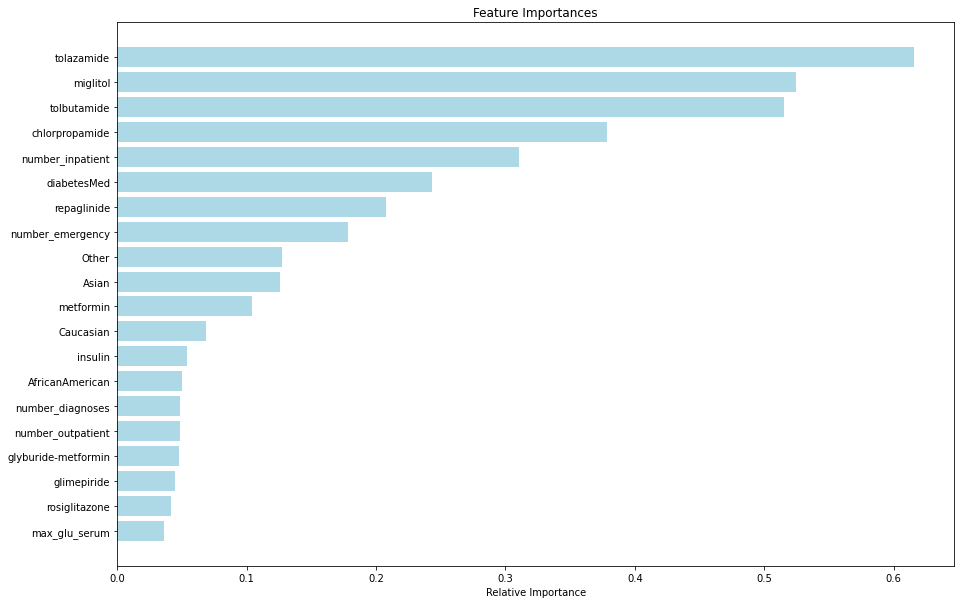

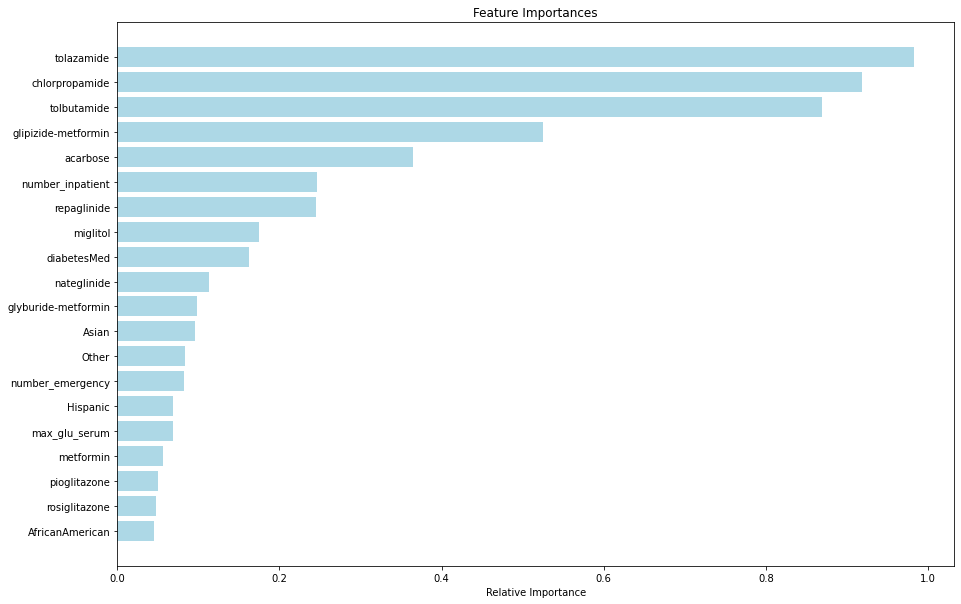

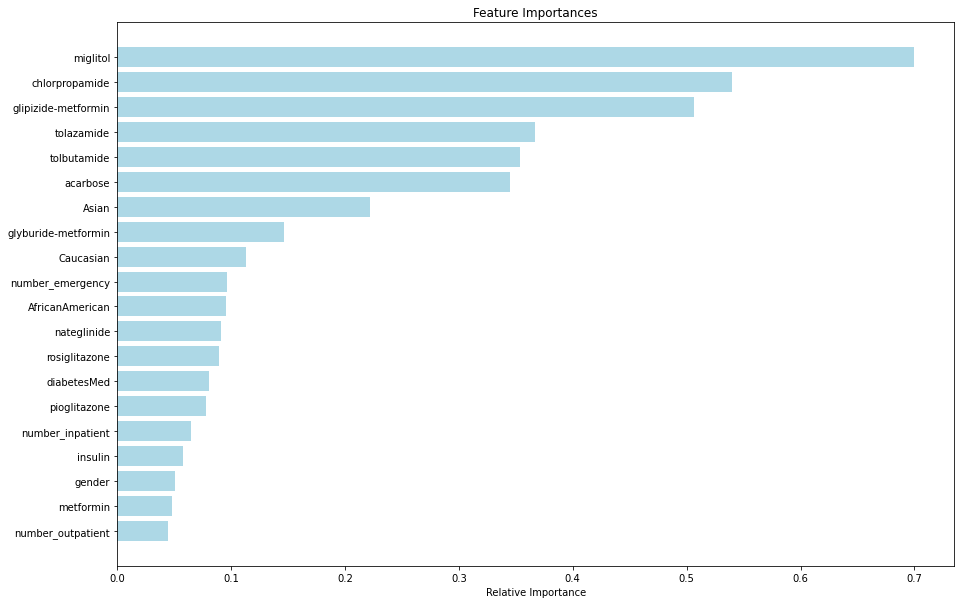

In [45]:
imp_lr = np.abs(lr.coef_)

for i in range(3):
    index_lr = np.argsort(imp_lr)[i][-20:]
    cols_lr = X_train.columns
    cols_lr = [cols_lr[x] for x in index_lr]

    plt.figure(figsize=(15,10))
    plt.xlabel('Relative Importance')
    plt.title('Feature Importances')
    plt.barh(range(len(index_lr)), imp_lr[i][index_lr], color='lightblue', align='center')
    plt.yticks(range(len(index_lr)), cols_lr)
    plt.show()

##### Random Forest Classifiers

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.preprocessing import label_binarize

In [22]:
# Further data preprocessing

# the categorical features
categorical = ['A1Cresult','max_glu_serum','admission_type_id','discharge_disposition_id','admission_source_id',
               'diag_1','diag_2','diag_3','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
               'glipizide', 'glyburide','tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol','tolazamide', 
               'insulin', 'glyburide-metformin', 'glipizide-metformin','change','diabetesMed','readmitted_in_30_days',
               'readmitted_after_30_days','readmitted','AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic','Other']

# we use the following features for prediction
predictors = ['gender', 'age', 'admission_type_id','discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
              'num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 
              'number_inpatient', 'diag_1','diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult','metformin', 
              'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride', 'glipizide', 'glyburide', 'tolbutamide', 
              'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin','glyburide-metformin', 
              'glipizide-metformin', 'change', 'diabetesMed','AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic','Other']


rf_df = df.copy()

for col in ['diag_1','diag_2','diag_3']:
    rf_df[col] = rf_df[col].astype('category').cat.codes

for col in categorical:
    rf_df[col] = rf_df[col].astype('category')

In [23]:
X = rf_df[predictors]
y_shortterm = rf_df['readmitted_in_30_days']
y_longterm = rf_df['readmitted_after_30_days']
y = rf_df['readmitted']

X_train_1, X_test_1, y_shortterm_train, y_shortterm_test = train_test_split(X, y_shortterm, test_size=0.25)
X_train_2, X_test_2, y_longterm_train, y_longterm_test = train_test_split(X, y_longterm, test_size=0.25)
X_train_3, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.25)

First, we built a model based on Random Forest to predict whether a patient will be readmitted in next 30 days. This is the short term readmission prediction model.

In [24]:
# Predict whether readmit in 30 days
rf1 = RandomForestClassifier(n_estimators = 200,
                              max_depth=10,
                              min_samples_split = 30,
                              max_features = 15,
                              min_samples_leaf=50)
rf1.fit(X_train_1, y_shortterm_train) 

y_shortterm_train_pred = rf1.predict(X_train_1)
y_shortterm_train_pred_prob = rf1.predict_proba(X_train_1)[:, 1]
y_shortterm_test_pred = rf1.predict(X_test_1)
y_shortterm_test_pred_prob = rf1.predict_proba(X_test_1)[:, 1]

print('Accuracy on training set:',accuracy_score(y_shortterm_train,y_shortterm_train_pred))
print('ROC_AUC score on training set:',roc_auc_score(y_shortterm_train, y_shortterm_train_pred_prob))
print('Accuracy on test set:',accuracy_score(y_shortterm_test,y_shortterm_test_pred))
print('ROC_AUC score on test set',roc_auc_score(y_shortterm_test, y_shortterm_test_pred_prob))

fpr_1, tpr_1,thres = roc_curve(y_shortterm_test, y_shortterm_test_pred_prob)
auc1 = auc(fpr_1, tpr_1)

Accuracy on training set: 0.9104887424492037
ROC_AUC score on training set: 0.7360065385091951
Accuracy on test set: 0.9134855714610316
ROC_AUC score on test set 0.6486470761141387


The accuracy of the short term readmission prediction model is high. With this model, we are able to predict whether a patient will be readmitted in the next 30 days. We should also notice that, although this model yields predictions with high accuracy, we can see that the AUC of this model is low. 

Then, we built a model based on Random Forest to predict whether a patient will be readmitted after 30 days.This is the long term readmission prediction model.

In [25]:
# Predict whether readmit after 30 days
rf2 = RandomForestClassifier(n_estimators = 200,
                              max_depth=20,
                              min_samples_split = 20,
                              max_features = 15)
#                               min_samples_leaf=10)
rf2.fit(X_train_2, y_longterm_train) 

y_longterm_train_pred = rf2.predict(X_train_2)
y_longterm_train_pred_prob = rf2.predict_proba(X_train_2)[:, 1]
y_longterm_test_pred = rf2.predict(X_test_2)
y_longterm_test_pred_prob = rf2.predict_proba(X_test_2)[:, 1]

print('Accuracy on training set:',accuracy_score(y_longterm_train,y_longterm_train_pred))
print('ROC_AUC score on training set:',roc_auc_score(y_longterm_train, y_longterm_train_pred_prob))
print('Accuracy on test set:',accuracy_score(y_longterm_test,y_longterm_test_pred))
print('ROC_AUC score on test set',roc_auc_score(y_longterm_test, y_longterm_test_pred_prob))

fpr_2, tpr_2,thres2 = roc_curve(y_longterm_test, y_longterm_test_pred_prob)
auc2 = auc(fpr_2, tpr_2)

Accuracy on training set: 0.8498740744948777
ROC_AUC score on training set: 0.9525749405645911
Accuracy on test set: 0.6329243353783232
ROC_AUC score on test set 0.6594028286262812


We can see that the both accuracy and the AUC of this model is low, which shows that data and feature we have are not enough to predict the long term readmission for patients. This intuitively make sense because the long term readmission of patients may affected by many other factors other than the features we have.

The two models above are both binary classifiers, seperating patients into two groups: readmitted in/after 30 days and not readmitted in/after 30 days. 


Now, we try to build a more general model -- a multi-class classifier, seperating patients into 3 groups: not readmitted, readmitted in 30 days and readmitted after 30 days. This is the general prediction model.

In [27]:
# Predict whether not readmit, readmit in 30 days or readmit after 30 days
rf3 = RandomForestClassifier(n_estimators = 200,
                              max_depth=20,
                              min_samples_split = 20,
                              max_features = 15,
                              min_samples_leaf=10)
rf3.fit(X_train_3, y_train)

y_train_pred = rf3.predict(X_train_3)
y_train_pred_prob = rf3.predict_proba(X_train_3)
y_test_pred = rf3.predict(X_test_3)
y_test_pred_prob = rf3.predict_proba(X_test_3)

print('Accuracy on training set:',accuracy_score(y_train,y_train_pred))
print('Accuracy on test set:',accuracy_score(y_test,y_test_pred))

y_test_onehot = label_binarize(y_test, classes = np.arange(3))
fpr_3, tpr_3, thresholds = roc_curve(y_test_onehot.ravel(),y_test_pred_prob.ravel())
auc3 = auc(fpr_3, tpr_3)
print('ROC_AUC score on test set',auc3)

Accuracy on training set: 0.7035164460603306
Accuracy on test set: 0.6159963644626222
ROC_AUC score on test set 0.8018893777291636


We can see that although the accuracy of prediction is not very high (probably affected by the failure of predicting long term readmission), the AUC score of this general prediction model is high, which shows that it is an acceptable (or even ideal) model given the data and feature we have.

Now, we compare the three random forest models we have. In this case, we believe AUC is a better metric for model evaluation because true/false positive rate matters a lot in medical services.

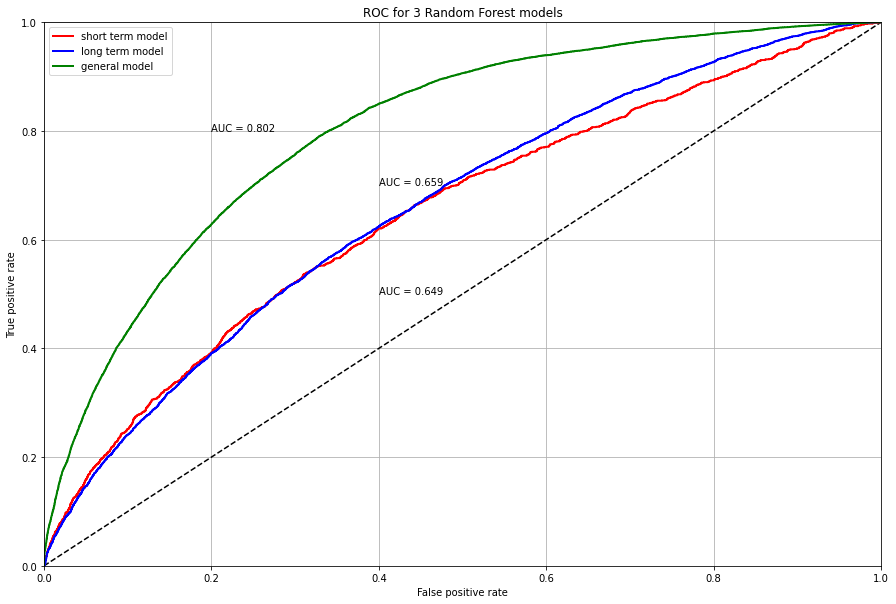

In [28]:

# Plot the ROC 
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1,"r",linewidth = 2,label = 'short term model')
plt.plot(fpr_2, tpr_2,"b",linewidth = 2,label = 'long term model')
plt.plot(fpr_3, tpr_3,"g",linewidth = 2,label = 'general model')
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('ROC for 3 Random Forest models')
plt.text(0.2,0.8,"AUC = "+ str(round(auc3,3)))
plt.text(0.4,0.7,"AUC = "+ str(round(auc2,3)))
plt.text(0.4,0.5,"AUC = "+ str(round(auc1,3)))
plt.legend()
plt.show()

In [ ]:
# Compare the accuracy of these three models

In [29]:
accuracy1 = accuracy_score(y_shortterm_test,y_shortterm_test_pred)
accuracy2 = accuracy_score(y_longterm_test,y_longterm_test_pred)
accuracy3 = accuracy_score(y_train,y_train_pred)
y = [accuracy1,accuracy2,accuracy3]
x = ['short-term model','long-term model','general']

Text(0.5, 1.0, 'Accuracy for 3 Random Forest models')

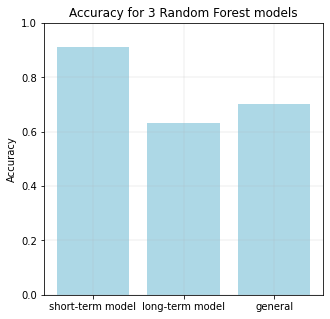

In [30]:
plt.figure(figsize=(5,5))
plt.grid(linestyle='-', linewidth=0.2)

plt.bar(x[0],y[0] ,color = 'lightblue')
plt.bar(x[1],y[1] ,color = 'lightblue')
plt.bar(x[2],y[2] ,color = 'lightblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title('Accuracy for 3 Random Forest models')
# for i, prob in enumerate(y):
#     plt.text(x[i], prob , str(round(prob,2)))

We also find out the 20 most important features for predicting the readmission. This is useful because in reality doctors and nurses can pay more attention to these features and make a rough prediction about whether a patient is going to be hosipitalized again.

Text(0.5, 0, 'Relative Importance')

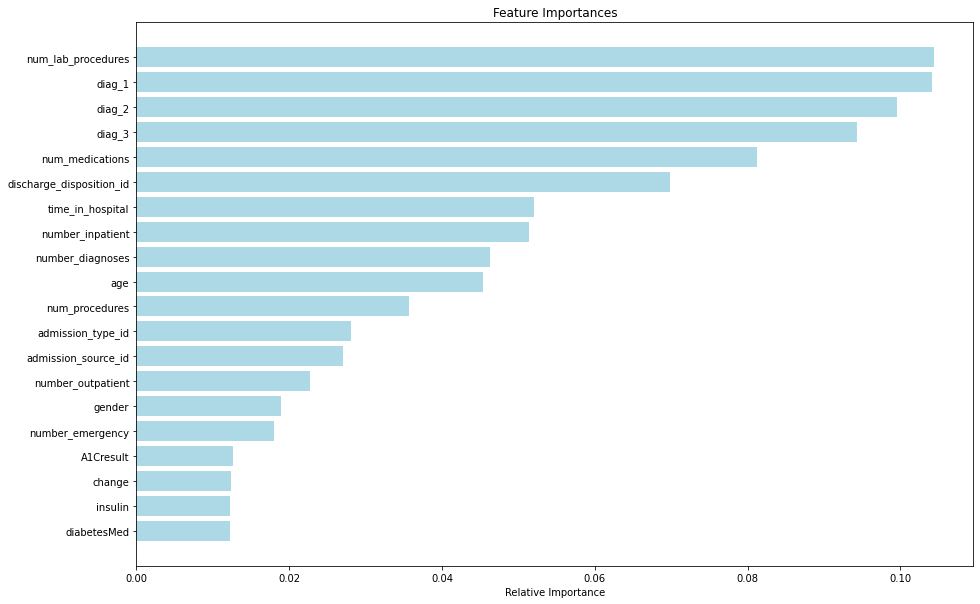

In [31]:
imp = rf3.feature_importances_
index = np.argsort(imp)[-20:]

cols = X_train_3.columns 
cols = [cols[x] for x in index]
plt.figure(figsize=(15,10))
plt.title('Feature Importances')
plt.barh(range(len(index)), imp[index], color='lightblue', align='center')
plt.yticks(range(len(index)), cols)
plt.xlabel('Relative Importance')

##### Compare the result

We compare the logistic regression model with the random forest model we built and plot the ROC of each of these models. We can see that the random forest model yields the best results.

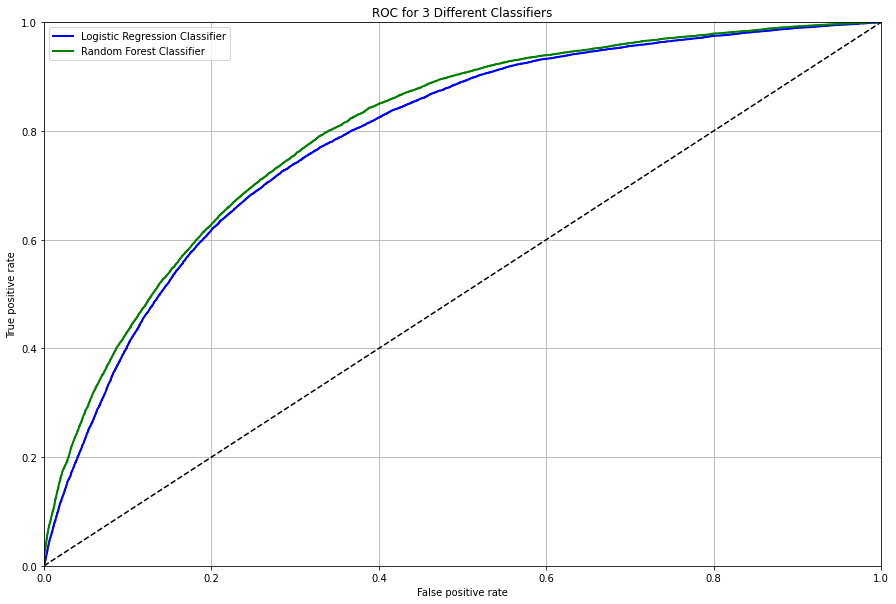

In [46]:
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_lr, tpr_lr,"b",linewidth = 2,label = 'Logistic Regression Classifier')
plt.plot(fpr_3, tpr_3,"g",linewidth = 2,label = 'Random Forest Classifier')
plt.grid()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('ROC for 3 Different Classifiers')
# plt.text(0.2,0.8,"AUC = "+ str(round(auc3,3)))
# plt.text(0.4,0.7,"AUC = "+ str(round(auc2,3)))
# plt.text(0.4,0.5,"AUC = "+ str(round(auc1,3)))
plt.legend()
plt.show()

#### Use PCA to reduce the dimension of the dataset, then use Kmeans algorithm to seperate the patients into different groups, find the best number of clusters

##### 3.2.1 PCA

Applying the elbow method, we use PCA to reduce the dimension of the dataset (from 44 to 5).

In [ ]:
# PCA
from sklearn.decomposition import PCA
from scipy import stats

In [ ]:
pca_df = df.copy()
pca_df = pca_df.drop(['encounter_id', 'patient_nbr','race','readmitted_in_30_days','readmitted_after_30_days'],axis = 1)

In [ ]:
for col in ['diag_1','diag_2','diag_3']:
    pca_df[col] = pca_df[col].astype('category').cat.codes
    
zscored_df = stats.zscore(pca_df)
pca = PCA().fit(zscored_df)

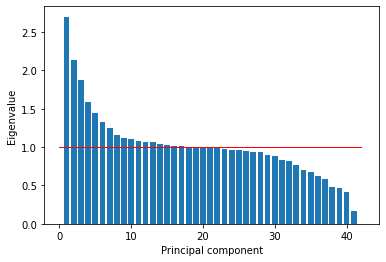

In [ ]:
# Scree Plot
eigval = pca.explained_variance_
numClasses = 42
plt.bar(np.linspace(1,42,42),eigval)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1)

We plot the relations between each principle component.

<Figure size 1080x720 with 0 Axes>

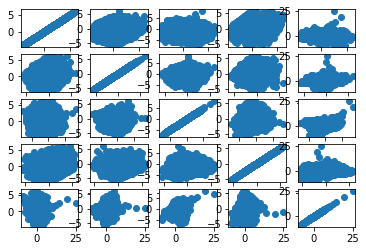

In [ ]:
num_pc = 5
new_df = PCA(n_components=num_pc).fit_transform(zscored_df)

plt.figure(figsize=(15,10))
fig, axes = plt.subplots(num_pc, num_pc)
count=0
for i in range(num_pc):
    for j in range(num_pc):
        axes[i,j].scatter(new_df[:,i],new_df[:,j])
        count+=1

##### 3.2.2 K-Means Clustering

In [ ]:
# K-Means
from sklearn.cluster import KMeans

We use the silhouette method to find out the best cluster number for the data.

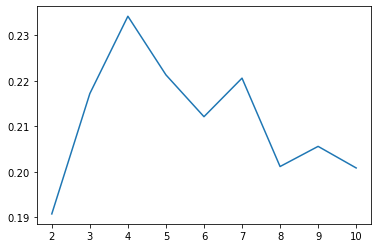

In [ ]:
sil_score= []
for i in range(2, 11): 
    kMeans = KMeans(n_clusters = int(i)).fit(new_df) 
    sil_score.append(silhouette_score(new_df, kMeans.labels_, metric='euclidean'))

plt.plot(np.linspace(2,10,9),sil_score)
plt.show()

The best cluster number is 4. We can can seperate the data into 4 clusters.

<!-- 1.重新定义问题
2.random forest best param
3.xgboost best param (accuracy/AUC)
4.logistic regression (accuracy/AUC)
5.accuracy/AUC plot
6.comments on code -->